### Rank Prediction Model for Starcraft Players

In this notebook, I will explain and demonstrate my process for building a model to predict a starcraft player’s rank using the information provided in the dataset.

#### Part 0. Reading Data and Performing EDA

In [1]:
import pandas as pd

# import data
df = pd.read_csv("starcraft_player_data.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [2]:
# Calculates basic statistics
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [3]:
# Counts the number of players in each rank
value_counts = df["LeagueIndex"].value_counts()
value_counts

LeagueIndex
4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: count, dtype: int64

It seems like this dataset has a class imbalance because of the sharp drop in frequency in 'LeagueIndex' values 1, 7, and 8. This means that each class is not equally represented in the dataset. Let's verify this by plotting 'LeagueIndex' as a histogram. There does exist a class imbalance as the histogram appear to have a left-skewed distribution.

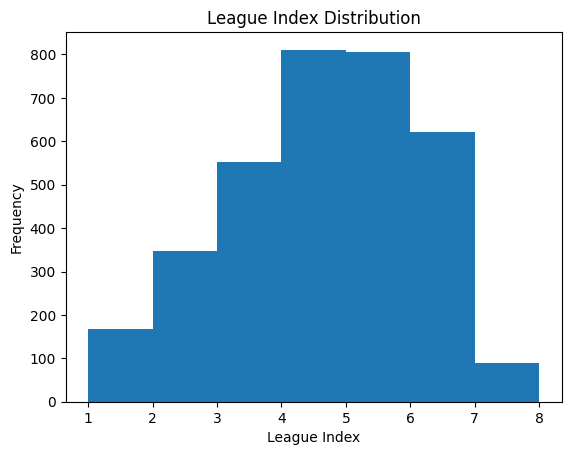

In [4]:
import matplotlib.pyplot as plt

plt.hist(df["LeagueIndex"], bins=7)

# Set labels and title
plt.xlabel("League Index")
plt.ylabel("Frequency")
plt.title("League Index Distribution")

# Show the plot
plt.show()

In [5]:
import numpy as np

# Replace "?" values with NaN
df.replace("?", np.nan, inplace=True)
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [6]:
# Displays distribution of rows with NaN values
df.isnull().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [7]:
# Number of rows containing null values
df.isnull().any(axis=1).sum()

57

It seems like all players that are ranked in the professional leagues ('LeagueIndex' = 8) are missing values in 'Age', 'HoursPerWeek', and 'TotalHours' columns. Let's verify this.

In [8]:
# Check if all rows with LeagueIndex = 8 have NaN values in specific columns
rows_with_league_8 = df[df['LeagueIndex'] == 8]
columns_to_check = ['Age', 'HoursPerWeek', 'TotalHours']
all_null_values = rows_with_league_8[columns_to_check].isnull().all().all()

if all_null_values:
    print("All rows with LeagueIndex = 8 have NaN values in columns 'Age', 'HoursPerWeek', and 'TotalHours'.")
else:
    print("Some rows with LeagueIndex = 8 do not have NaN values in columns 'Age', 'HoursPerWeek', and 'TotalHours'.")

All rows with LeagueIndex = 8 have NaN values in columns 'Age', 'HoursPerWeek', and 'TotalHours'.


I am going to remove the missing values because scikit-learn library does not handle missing values. Let's drop a row if it contains NaN values in any column.
Note: The model will not be able to predict players in professional league because all rows of players that play in the professional leagues contain NaN values, therefore dropped from the dataset.

In [9]:
# drop rows with NaN values
df.dropna(inplace=True)

In [10]:
# Shows date types of all columns
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [11]:
# Converts columns 'Age', 'HoursPerWeek', and 'TotalHours' to 'int64'
df['Age'] = df['Age'].astype('int64')
df['HoursPerWeek'] = df['HoursPerWeek'].astype('int64')
df['TotalHours'] = df['TotalHours'].astype('int64')

In [12]:
# Shows date types of all columns
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

(Optional) Let's check the distribution of each column.

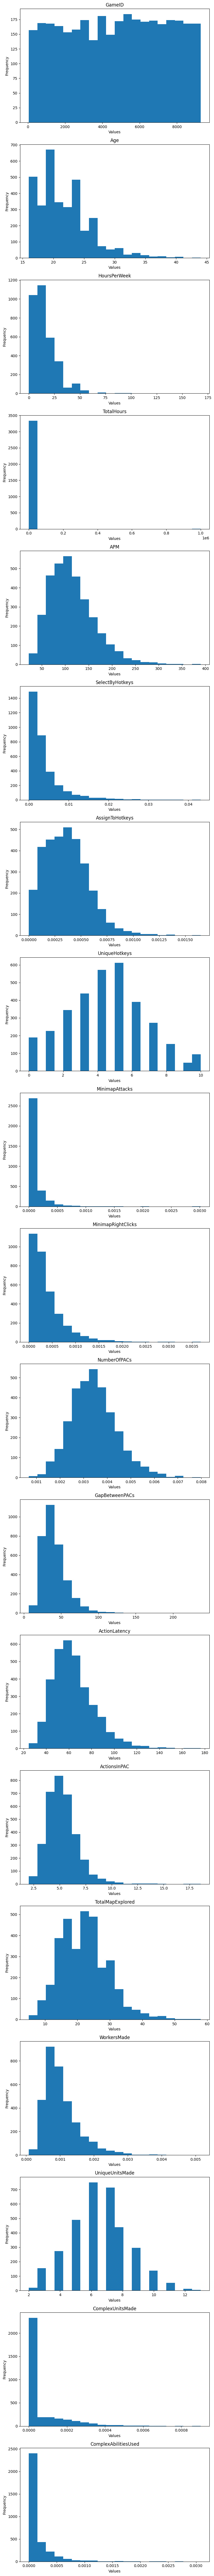

In [13]:
# Select all columns except 'LeagueIndex'
columns_to_plot = df.loc[:, df.columns != 'LeagueIndex']

# Determine the number of columns
num_columns = len(columns_to_plot.columns)

# Create subplots with a specified number of rows and columns
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 5*num_columns))

# Iterate over each column and plot the histogram on a separate subplot
for i, column in enumerate(columns_to_plot.columns):
    ax = axes[i] if num_columns > 1 else axes
    column_data = columns_to_plot[column]
    ax.hist(column_data, bins=20)  # Adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Part 1. Choosing the Model

Predicting a player's rank from bronze to professional leagues (encoded 1-8) is considered a classification problem as the player's rank is treated as a discrete set of classes: 1, 2, 3, 4, 5, 6, 7, and 8. Each player will be assigned to one of these discrete classes based on their predicted rank. I approach this problem as a multi-class classification task, where I would train a model to classify players into one of the eight rank categories based on the given features.  
 
 
I chose random forest classifier for this problem because it can handle imbalanced data better than some other algorithms as the nature of the random forest helps maintain a balanced representation across different classes. This algorithm can also handle tasks where the target variable has more than two categories.

Note: I also tried several other models like multinomial logistic regression, linear regression, and decision tree classifier, but all of them either yield similar or worse results. 

#### Part 2. Building Random Forest Classification Model

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


def preprocess_data(file):
    """
    Removes rows with NaN values and corrects data types from the given file.
    """
    df = pd.read_csv(file)
    df.replace("?", np.nan, inplace=True)
    df.dropna(inplace=True)
    df['Age'] = df['Age'].astype('int64')
    df['HoursPerWeek'] = df['HoursPerWeek'].astype('int64')
    df['TotalHours'] = df['TotalHours'].astype('int64')
    return df


def define_labels_features(df):
    """
    Defines the labels and features of the model.
    GameID is excluded from the features as it is a unique identifier for each player.
    """
    X = df.drop(["GameID", "LeagueIndex"], axis=1)
    y = df["LeagueIndex"]
    return X, y


def select_top_features(X, y):
    """
    Splits the given labels and features into training and testing data and selects the top ten features with highest importance.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    selector = SelectKBest(score_func=chi2, k=10)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X.columns[selector.get_support()]
    return X_train_selected, X_test_selected, y_train, y_test, selected_features


def select_best_max_depth(X_train_selected, X_test_selected, selected_features, y_train, y_test):
    """
    Returns the hyperparameter max depth for a RandomForestClassifier that has the highest test accuracy.
    """
    max_depth_values = range(1, 11)
    train_accuracy = []
    test_accuracy = []

    for depth in max_depth_values:
        model = RandomForestClassifier(max_depth=depth)
        model.fit(X_train_selected, y_train)
            
        train_predictions = model.predict(X_train_selected)
        train_acc = accuracy_score(y_train, train_predictions)
        train_accuracy.append(train_acc)
            
        test_predictions = model.predict(X_test_selected)
        test_acc = accuracy_score(y_test, test_predictions)
        test_accuracy.append(test_acc)

        best_max_depth = max_depth_values[np.argmax(test_accuracy)]
    return best_max_depth

def build_model(X_train_selected, X_test_selected, selected_features, y_train, y_test, best_max_depth):
    """
    Builds a RandomForestClassifier model using the selected features and labels, and evaluates its performance.
    """
    model = RandomForestClassifier(max_depth=best_max_depth)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    print("Model Evaluation:")
    print(classification_report(y_test, y_pred, zero_division=1))

    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importance})
    print()
    print("Feature Importance:")
    print(feature_importance.sort_values(by='Importance', ascending=False))

    train_predictions = model.predict(X_train_selected)
    print()
    print()
    print("Train Accuracy: " + str(accuracy_score(y_train, train_predictions)))

    test_predictions = model.predict(X_test_selected)
    print("Test Accuracy: " + str(accuracy_score(y_test, test_predictions)))

    print()
    print("Predictions:")
    print(test_predictions)


def main():
    df = preprocess_data("starcraft_player_data.csv")
    X, y = define_labels_features(df)
    X_train_selected, X_test_selected, y_train, y_test, selected_features = select_top_features(X, y)
    best_max_depth = select_best_max_depth(X_train_selected, X_test_selected, selected_features, y_train, y_test)
    build_model(X_train_selected, X_test_selected, selected_features, y_train, y_test, best_max_depth)


if __name__ == "__main__":
    main()

Model Evaluation:
              precision    recall  f1-score   support

           1       0.39      0.29      0.33        24
           2       0.33      0.17      0.23        69
           3       0.35      0.37      0.36       102
           4       0.36      0.44      0.39       151
           5       0.38      0.48      0.42       157
           6       0.65      0.48      0.56       161
           7       1.00      0.00      0.00         4

    accuracy                           0.41       668
   macro avg       0.49      0.32      0.33       668
weighted avg       0.43      0.41      0.41       668


Feature Importance:
            Feature  Importance
6     ActionLatency    0.193411
3               APM    0.166579
5    GapBetweenPACs    0.127965
2        TotalHours    0.115927
7      ActionsInPAC    0.095636
8  TotalMapExplored    0.070530
1      HoursPerWeek    0.064060
0               Age    0.061033
4     UniqueHotkeys    0.057436
9   UniqueUnitsMade    0.047421


Train Accu

#### Part 3. Findings

**Feature Importance:** The model identified the top 10 features that are most important in predicting a StarCraft player's game rank. The features are ranked based on their importance scores, which indicate their contribution to the model's predictions.
- The most important feature is "ActionLatency" with an importance score of 0.254. It suggests that the time it takes for a player to react to the game's events is a significant factor in determining their rank.
- The second most important feature is "APM" (Actions Per Minute) with an importance score of 0.245. A higher APM indicates a player's speed and efficiency in executing actions, which correlates with their rank.
- Other important features include "TotalHours" (total hours played), "GapBetweenPACs" (time gap between consecutive player action cycles), "ActionsInPAC" (number of actions per action cycle), and more.

**Model Performance:** The model's overall accuracy, which measures the percentage of correct predictions, is 40%. This means that the model predicts the correct rank category for 40% of the StarCraft players in the test dataset.
- Precision: Precision is a measure of how many predicted instances of a rank category are actually correct. For example, the precision for rank category 1 is 62%, which means that 62% of the players predicted as rank 1 are actually rank 1 players.
- Recall: Recall measures the percentage of correctly predicted instances of a rank category out of the total instances of that category in the dataset. It gives an idea of how well the model captures all instances of a particular rank category.
- F1-score: The F1-score is a balanced measure that combines precision and recall. It provides an overall evaluation of the model's performance for each rank category.

**Insights for Stakeholders:** Based on the model's performance and feature importance, here are some insights for stakeholders:
- ActionLatency and APM are the most important features, suggesting that players' reaction time and speed of execution significantly impact their rank. Stakeholders could consider focusing on improving these aspects to enhance players' performance.
- Other important features such as TotalHours, GapBetweenPACs, and ActionsInPAC also have a notable influence on the model's predictions. Stakeholders can explore strategies to optimize these factors to improve players' ranks.
- The model's overall accuracy is 40%, indicating that there is room for improvement. Stakeholders could consider collecting more data or refining the model to achieve higher accuracy and more reliable predictions.

**Advice for Stakeholders:** Based on the EDA and model results, here's how I would advise stakeholders if more data can be collected:
- I would address the significant class imbalance in the dataset, especially for players ranked Grandmaster and those who play in the professional league. Currently, there is less data available for these categories, which can affect the model's ability to accurately predict their ranks. I would encourage stakeholders to focus on collecting additional data specifically for these underrepresented categories. This can involve reaching out to a larger sample of Grandmaster players and professional league players to ensure a more balanced dataset.
- I would emphasize the importance of collecting complete information for all features, including age, hours played per week, and total hours played for professional players. Currently, there are missing values for age, hours played per week, and total hours playeds which can impact the model's ability to consider this feature as a factor in predicting ranks. This will help create a more accurate representation of the player profiles and improve the model's predictive capabilities.